# Phase 1: we will just choose 1 feature and see
I will use studying hours as feature and exam results as target and see

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/lainguyn123/student-performance-factors/StudentPerformanceFactors.csv
/kaggle/input/student-performance-factors/__results__.html
/kaggle/input/student-performance-factors/__notebook__.ipynb
/kaggle/input/student-performance-factors/__output__.json
/kaggle/input/student-performance-factors/custom.css
/kaggle/input/student-performance-factors/__results___files/__results___18_10.png
/kaggle/input/student-performance-factors/__results___files/__results___18_8.png
/kaggle/input/student-performance-factors/__results___files/__results___18_1.png
/kaggle/input/student-performance-factors/__results___files/__results___18_9.png
/kaggle/input/student-performance-factors/__results___files/__results___20_0.png
/kaggle/input/student-performance-factors/__results___files/__results___40_0.png
/kaggle/input/student-performance-factors/__results___files/__results___18_5.png
/kaggle/input/student-performance-factors/__results___files/__results___25_0.png
/kaggle/input/student-performance-

## Loading dataset

In [2]:
import pandas as pd

# Load CSV from Kaggle's mounted input path



# Load CSV from Kaggle's mounted input path
df = pd.read_csv("/kaggle/input/d/lainguyn123/student-performance-factors/StudentPerformanceFactors.csv")


# Check first few rows
df[:10]


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


##  Step 3: Data info & cleaning


In [3]:
# Step 3: Data info & cleaning
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [5]:
# Drop duplicates
df = df.drop_duplicates()

In [6]:
# Keep only rows with non-missing study hours and score
df = df.dropna(subset=['Hours_Studied', 'Exam_Score'])


##  Step 4: Visualization


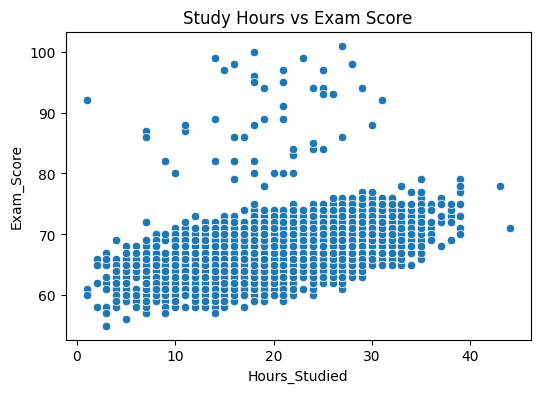

In [7]:
# Step 4: Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.title('Study Hours vs Exam Score')
plt.show()



## Correlation (VERY IMPORTANT TO KNOW THE RELATION BEWTTEN THE FEATURE AND THE TARGET)

In [8]:
print("Correlation:\n", df[['Hours_Studied', 'Exam_Score']].corr())


Correlation:
                Hours_Studied  Exam_Score
Hours_Studied       1.000000    0.445455
Exam_Score          0.445455    1.000000


### AS YOU CAN SEE FROM CORRELATION, (THAT NOT ALWAYS THE STUDY TIME MATTERS :D)  -- AS IN CORR IF YOU DON'T KNOW :--  Correlation close to +1 → strong positive relationship. Correlation close to 0 → weak/no relationship.

In [9]:
# Step 5: Train-test split

from sklearn.model_selection import train_test_split

X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Step 6: Train Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Check slope and intercept
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (coefficient): 0.285668744443087
Intercept: 61.51116746904424


An intercept of 61.51 means that if someone studies for zero hours, their predicted exam score would be 61.51. It represents the baseline score you'd expect to get without any study time.

A slope of approximately 0.286 means that for every additional hour you study, your predicted exam score increases by about 0.286 points. It shows the rate of change.

##  Step 7: Predictions & visualization


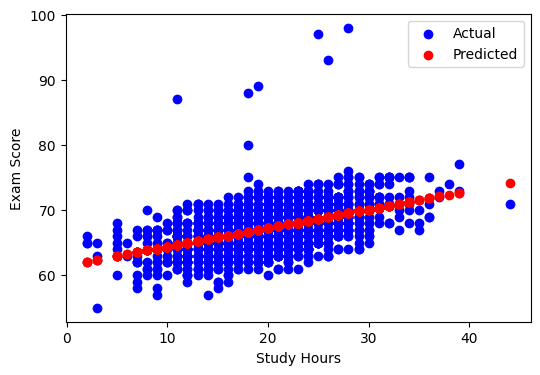

In [11]:
# Step 7: Predictions & visualization
y_pred = model.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()


Very bad resukt from the graph :(

In [12]:
# Step 8: Model evaluation

from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 10.85592128879332
R² Score: 0.2319868674542106


**   #  OK NOW AS YOU SEE THE VOLUTION OF OUR MODEL IS VERY BAD, WOMP WOMP :( :( ☹️**

WE WILL TRYY ANOTHER FEATURES! OOR MAYBE ANOTHER MODEL :D


# phase 2: Try another features & maybe we'll try 'em all

## Show correlation for each feature

📊 Numeric Feature: Hours_Studied | Correlation with Exam_Score: 0.45


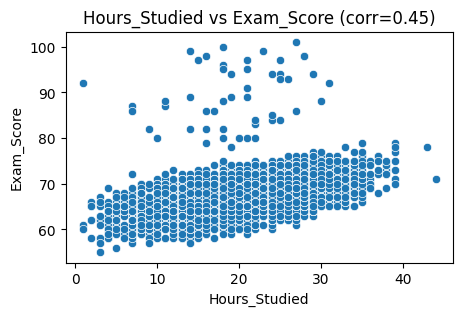

📊 Numeric Feature: Attendance | Correlation with Exam_Score: 0.58


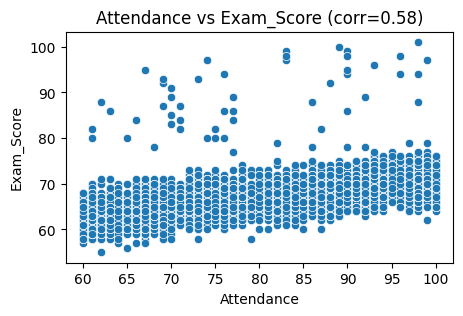

📊 Numeric Feature: Sleep_Hours | Correlation with Exam_Score: -0.02


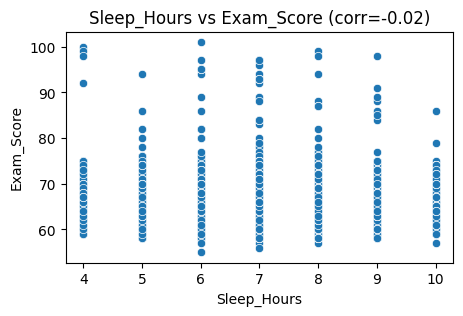

📊 Numeric Feature: Previous_Scores | Correlation with Exam_Score: 0.18


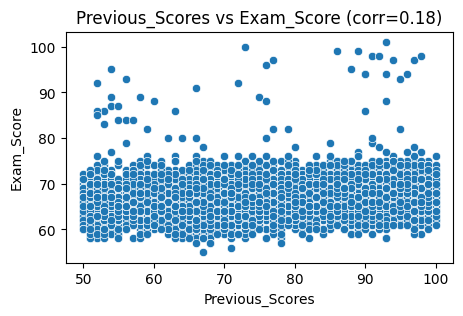

📊 Numeric Feature: Tutoring_Sessions | Correlation with Exam_Score: 0.16


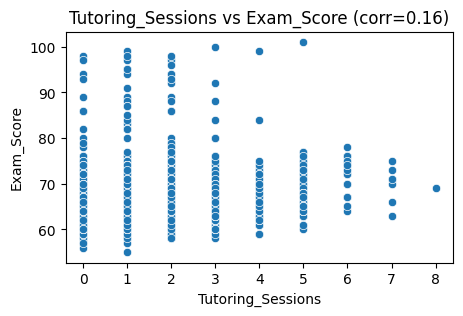

📊 Numeric Feature: Physical_Activity | Correlation with Exam_Score: 0.03


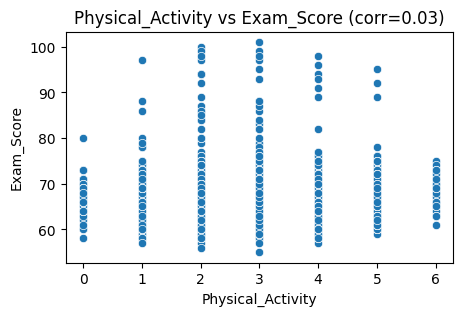

📊 Categorical Feature: Parental_Involvement
Parental_Involvement
Low       66.358265
Medium    67.098156
High      68.092767
Name: Exam_Score, dtype: float64 



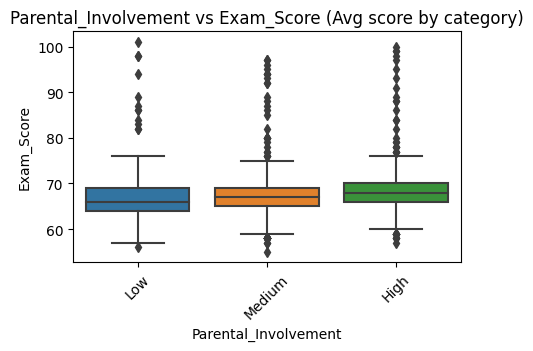

📊 Categorical Feature: Access_to_Resources
Access_to_Resources
Low       66.203351
Medium    67.134378
High      68.092152
Name: Exam_Score, dtype: float64 



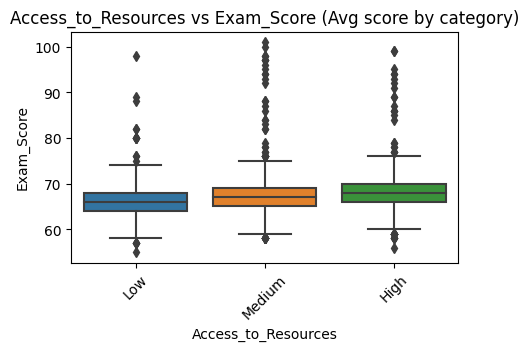

📊 Categorical Feature: Extracurricular_Activities
Extracurricular_Activities
No     66.931435
Yes    67.441849
Name: Exam_Score, dtype: float64 



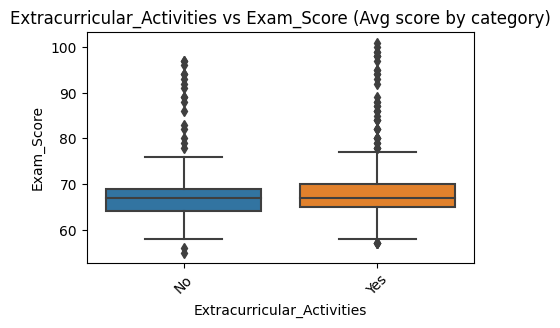

📊 Categorical Feature: Motivation_Level
Motivation_Level
Low       66.752194
Medium    67.330648
High      67.704321
Name: Exam_Score, dtype: float64 



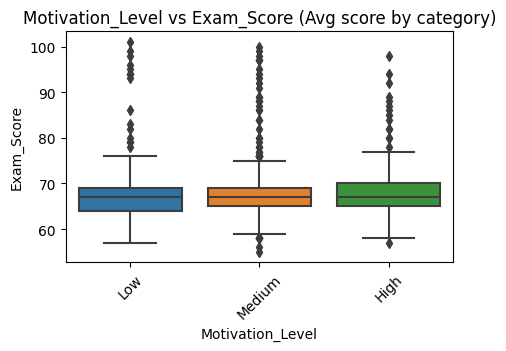

📊 Categorical Feature: Internet_Access
Internet_Access
No     66.535070
Yes    67.292895
Name: Exam_Score, dtype: float64 



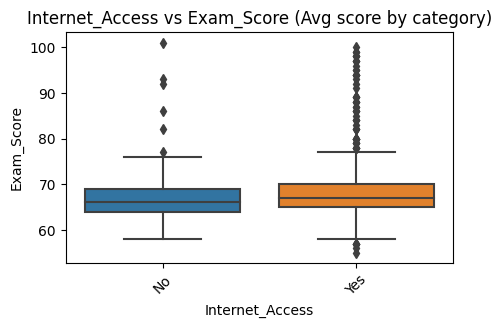

📊 Categorical Feature: Family_Income
Family_Income
Low       66.848428
Medium    67.334959
High      67.842396
Name: Exam_Score, dtype: float64 



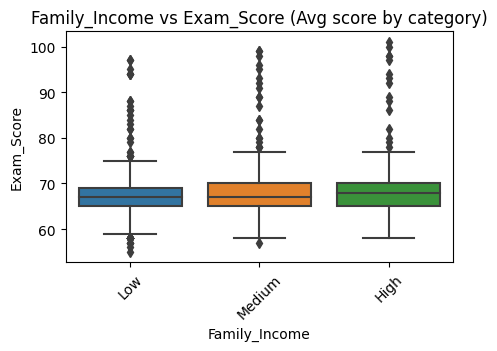

📊 Categorical Feature: Teacher_Quality
Teacher_Quality
Low       66.753425
Medium    67.109299
High      67.676939
Name: Exam_Score, dtype: float64 



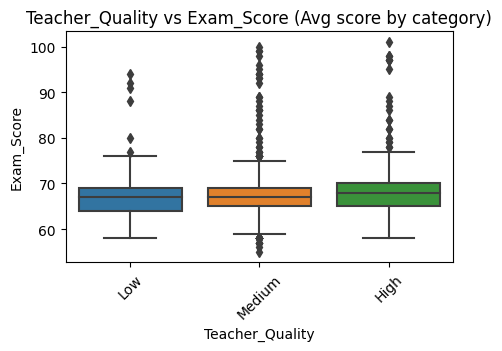

📊 Categorical Feature: School_Type
School_Type
Public     67.212919
Private    67.287705
Name: Exam_Score, dtype: float64 



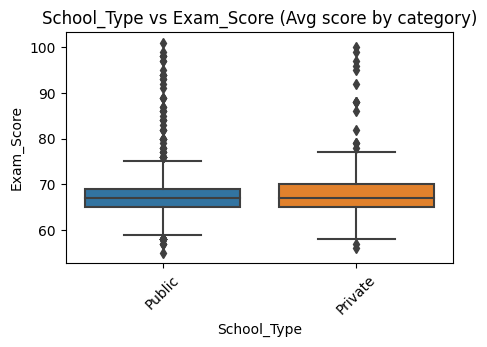

📊 Categorical Feature: Peer_Influence
Peer_Influence
Negative    66.564270
Neutral     67.197917
Positive    67.623199
Name: Exam_Score, dtype: float64 



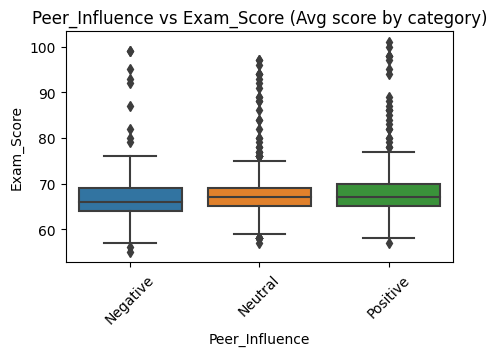

📊 Categorical Feature: Learning_Disabilities
Learning_Disabilities
Yes    66.270504
No     67.349120
Name: Exam_Score, dtype: float64 



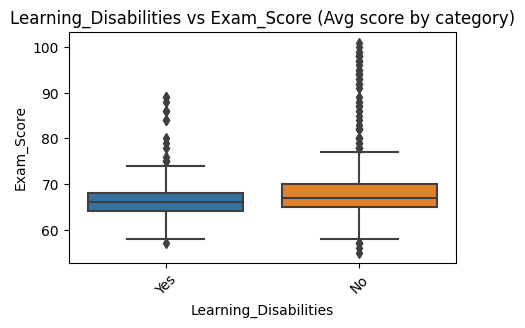

📊 Categorical Feature: Parental_Education_Level
Parental_Education_Level
High School     66.893577
College         67.315737
Postgraduate    67.970881
Name: Exam_Score, dtype: float64 



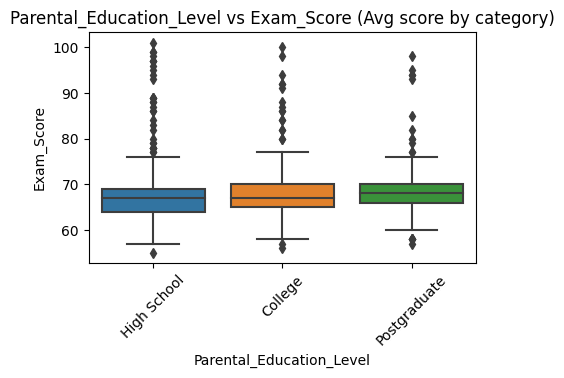

📊 Categorical Feature: Distance_from_Home
Distance_from_Home
Far         66.457447
Moderate    66.981481
Near        67.512101
Name: Exam_Score, dtype: float64 



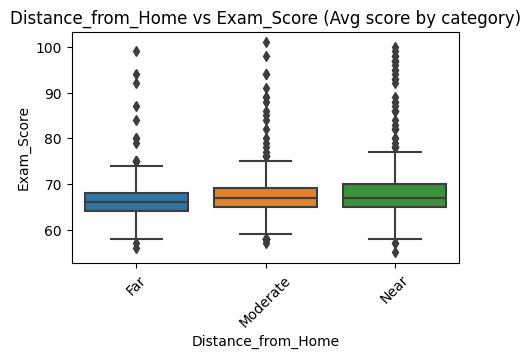

📊 Categorical Feature: Gender
Gender
Male      67.228894
Female    67.244898
Name: Exam_Score, dtype: float64 



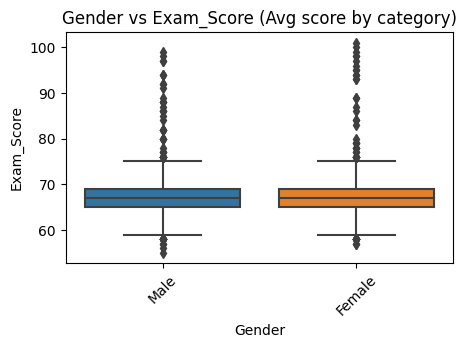

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

target = 'Exam_Score'

# Separate numeric and categorical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)
cat_cols = df.select_dtypes(include=['object']).columns

# 1️⃣ Numeric features analysis
for col in numeric_cols:
    corr = df[[col, target]].corr().iloc[0,1]
    print(f"📊 Numeric Feature: {col} | Correlation with {target}: {corr:.2f}")
    plt.figure(figsize=(5,3))
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f"{col} vs {target} (corr={corr:.2f})")
    plt.show()

# 2️⃣ Categorical features analysis
for col in cat_cols:
    mean_scores = df.groupby(col)[target].mean().sort_values()
    print(f"📊 Categorical Feature: {col}")
    print(mean_scores, "\n")
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x=col, y=target, order=mean_scores.index)
    plt.title(f"{col} vs {target} (Avg score by category)")
    plt.xticks(rotation=45)
    plt.show()


## What I have noticed form this graphs

study hours and attendece unfortuntaly makes an impact on your results, also the motivation does, 

i will stick with those 3 features and see! what will happen

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Select only the chosen features
X = df[['Hours_Studied', 'Attendance', 'Motivation_Level']]
y = df['Exam_Score']  

# Preprocessing: encode Motivation_Level
categorical_features = ['Motivation_Level']
numeric_features = ['Hours_Studied', 'Attendance']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


NameError: name 'OneHotEncoder' is not defined

In [ ]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


In [ ]:
# Scatter plot: actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)  # perfect prediction line
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ======= Load data =======

# ======= Features & Target =======
features = ["Hours_Studied", "Attendance", "Motivation_Level"]  
target = "Exam_Score"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ["Hours_Studied", "Attendance"]
categorical_features = ["Motivation_Level"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

def train_and_evaluate(pipe, title):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{title}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Final Score")
    plt.ylabel("Predicted Final Score")
    plt.title(title)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
    plt.show()

linear_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
train_and_evaluate(linear_pipe, "Linear Regression (Baseline)")

poly2_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", LinearRegression())
])
train_and_evaluate(poly2_pipe, "Polynomial Regression (Degree 2)")

poly3_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("regressor", LinearRegression())
])
train_and_evaluate(poly3_pipe, "Polynomial Regression (Degree 3)")


SO, IT'S ACTUALLY ABOUT CHOOSING MORE FEATURES IN THIS CASE!!

# phase 3: Try all the features! 

In [ ]:
# All features except Exam_Score
features = [
    "Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources",
    "Extracurricular_Activities", "Sleep_Hours", "Previous_Scores", "Motivation_Level",
    "Internet_Access", "Tutoring_Sessions", "Family_Income", "Teacher_Quality",
    "School_Type", "Peer_Influence", "Physical_Activity", "Learning_Disabilities",
    "Parental_Education_Level", "Distance_from_Home", "Gender"
]

target = "Exam_Score"

X = df[features]
y = df[target]


## Getting the  categorical_features and numurical ones

In [ ]:
categorical_features = [
    "Parental_Involvement", "Extracurricular_Activities", "Motivation_Level",
    "Internet_Access", "School_Type", "Peer_Influence",
    "Learning_Disabilities", "Parental_Education_Level", "Gender"
]

numerical_features = [col for col in features if col not in categorical_features]


## Preprocessing Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures





# Preprocessing: encode categorical + scale numeric
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Linear Regression

In [ ]:
linear_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Linear Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_linear)}")
print(f"R²: {r2_score(y_test, y_pred_linear)}")


##  Polynomial Regression (Degree 2)


In [ ]:
poly_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("Polynomial Regression (degree 2):")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly)}")
print(f"R²: {r2_score(y_test, y_pred_poly)}")


### nice MSE BTW, IT DROPPED A LOT AND THAT IS VERY NICE

# phase 4: I will go with feature engineering! 

## Create the new features



In [ ]:
# Create Study_Efficiency
df['Study_Efficiency'] = df['Hours_Studied'] / (df['Sleep_Hours'] + 1e-5)  # small value to avoid division by zero


# Check the new columns
df[['Study_Efficiency']].head()



features = ["Study_Efficiency", "Attendance","Motivation_Level", "Teacher_Quality"]

target = "Exam_Score"

X = df[features]
y = df[target]


# Identify numeric and categorical columns in the chosen features
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
linear_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Linear Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_linear)}")
print(f"R²: {r2_score(y_test, y_pred_linear)}")


OOPS OH OH ! IT GET WORSE! 

# FINAL OBSERVATION:

## When I used all features, it get the best result with the lowest MSE! AND Higher R**2